In [ ]:
#import the mnist dataset
from keras.datasets import mnist

In [ ]:
#imports used to build the deep learning model
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten 
from keras.layers.core import Dense

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#cv2.imshow() doesnt work with jupyter. Using colabs_cv2 instead to show inline
from google.colab.patches import cv2_imshow

In [ ]:
#adding a function to build leNet structure
def build_lenet(width, height, depth, classes, weightsPath = None):
  #initialize the model
  model = Sequential()

  #the first set of conv => relu => pool layers
  model.add(Conv2D(20, (5, 5), padding = "same",
            input_shape = (height, width, depth)))

  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  #the second set of conv => relu => pool layers
  model.add(Conv2D(50, (5, 5), padding = "same",
            input_shape = (height, width, depth)))

  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  #the set of fc => relu layers
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))

  #the softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))

  #if a weights path is supplied, then use the weights
  if weightsPath is not None:  
    model.load_weights(weightsPath)

  #returns the constructed network architeture
  return model

In [ ]:
#adding utility function to graph the training history
def graph_training_history(history):
  plt.rcParams["figure.figsize"] = (12, 9)
  plt.style.use('ggplot')
  plt.figure(1)

  #summarize history for accuracy
  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training, Validation'], loc = 'lower right')

  #summarize history for loss
  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training, Validation'], loc = 'upper right')

  plt.tight_layout()
  plt.show()

In [ ]:
#getting MNIST dataset from Keras datasets
#if this is the first time you are fetching the dataset, it will be downloaded
#file size will be ~10mb, and will be placed at ~/.keras/datasets/mnist.npz
print("[INFO] Loading the MNIST dataset...")
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
#the data is already in the form of numpy arrays,
#and already split to training and testing datasets

[INFO] Loading the MNIST dataset...


In [ ]:
#reshape the data matrix from (samples, height, width) to 
          #(samples, height, width, depth)
          
#depth(i.e channels) is 1 onde mnist only has grayscale images
trainData = trainData[:, :, :, np.newaxis]
testData = testData[:, :, :, np.newaxis]

In [ ]:
#rescale the data from values between [0 - 255] to [0 - 1.0]
trainData = trainData / 255.0
testData = testData / 255.0

In [ ]:
#the labels come as a single digit, indicating the class
#but a categorical vector is needed as label, so that
#'0' will become [1, 0, 0, 0, 0, 0, 0, 0, 0]
#'1' will become [0, 1, 0, 0, 0, 0, 0, 0, 0]
#'2' will become [0, 0, 1, 0, 0, 0, 0, 0, 0]
#and so on...
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

In [ ]:
#building and compiling the model
print("[INFO] Building and compiling the LeNet model...")

opt = SGD(learning_rate = 0.01)
model = build_lenet(width = 28, height = 28, depth = 1, 
                    classes = 10, weightsPath = None)

model.compile(loss = "categorical_crossentropy", 
              optimizer = opt, metrics = ["accuracy"])

[INFO] Building and compiling the LeNet model...


In [ ]:
print("[INFO] Training the model...")

history = model.fit(trainData, trainLabels, batch_size = 128, epochs = 20,
                    validation_data = (testData, testLabels), verbose = 1)

[INFO] Training the model...
Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9718 - accuracy: 0.7428 - val_loss: 0.3114 - val_accuracy: 0.9114
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2573 - accuracy: 0.9237 - val_loss: 0.2028 - val_accuracy: 0.9396
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1813 - accuracy: 0.9466 - val_loss: 0.1510 - val_accuracy: 0.9561
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1426 - accuracy: 0.9585 - val_loss: 0.1197 - val_accuracy: 0.9643
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1187 - accuracy: 0.9651 - val_loss: 0.0960 - val_accuracy: 0.9711
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1016 - accuracy: 0.9701 - val_loss: 0.0835 - val_accuracy: 0.9737
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0905 - accuracy: 0.9735 - val_loss: 

In [ ]:
#using test data to evaluate the model
print("[Info] Evaluating the model...")

(eval_loss, eval_accuracy) = model.evaluate(testData, testLabels,
                                            batch_size = 128, verbose = 1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] loss: {}".format(eval_loss))

[Info] Evaluating the model...
79/79 [==============================] - 1s 7ms/step - loss: 0.0429 - accuracy: 0.9833
[INFO] accuracy: 98.33%
[INFO] loss: 0.042883604764938354


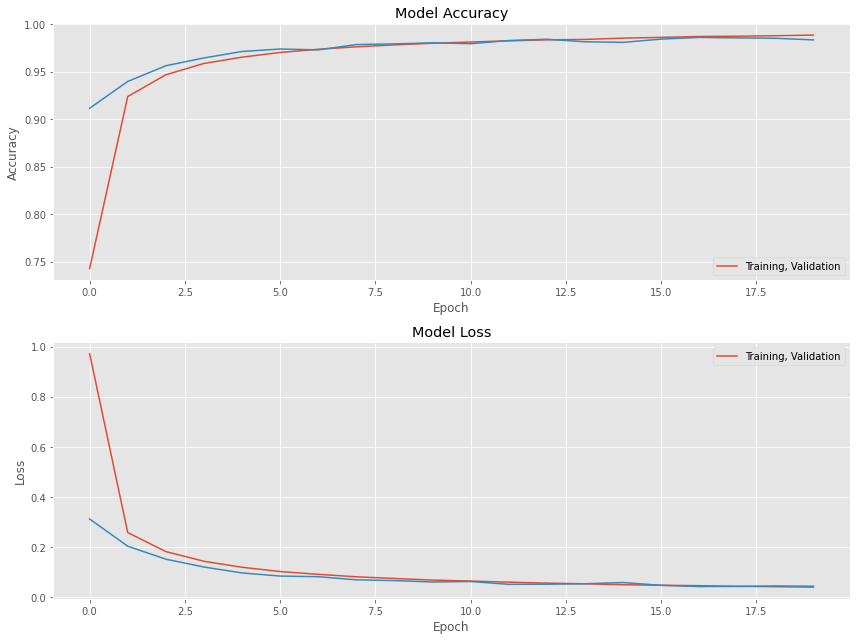

In [ ]:
#visualization of training history
graph_training_history(history)

In [ ]:
print("[Info] Saving the model weights to file...")
model.save_weights("/content/lenet_weights.hdf5", overwrite = True)

[Info] Saving the model weights to file...




[INFO] Predicted: 3, Actual 3


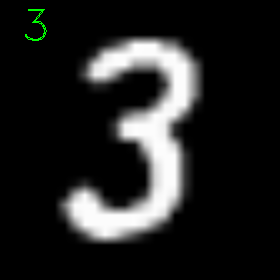



[INFO] Predicted: 5, Actual 5


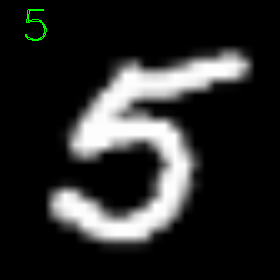



[INFO] Predicted: 7, Actual 7


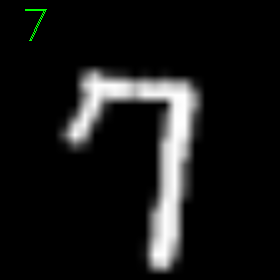



[INFO] Predicted: 2, Actual 2


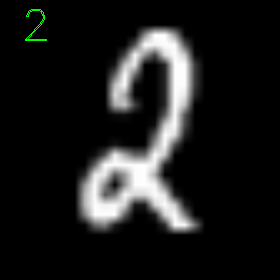



[INFO] Predicted: 3, Actual 3


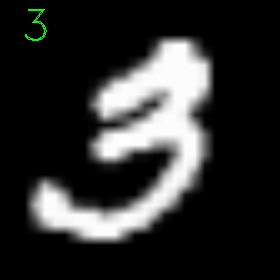



[INFO] Predicted: 7, Actual 7


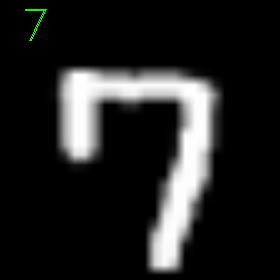



[INFO] Predicted: 6, Actual 6


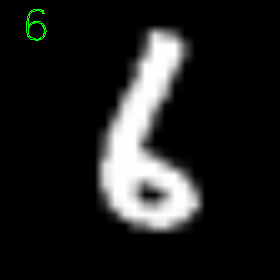



[INFO] Predicted: 5, Actual 5


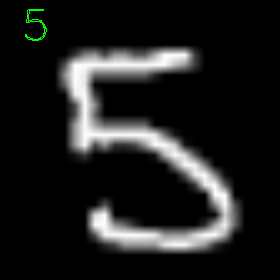



[INFO] Predicted: 3, Actual 3


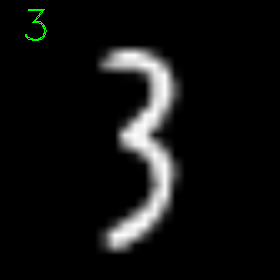



[INFO] Predicted: 0, Actual 0


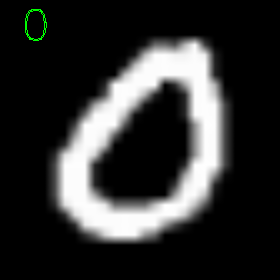

In [ ]:
#training is completed
#radonly selecting samples from the test data set to evaluate

for i in np.random.choice(np.arange(0, len(testLabels)), size = (10,)):
  #uses the model to classify the digit
  probs = model.predict(testData[np.newaxis, i])
  prediction = probs.argmax(axis = 1)

  #converts the digit data to a color image
  image = (testData[i] * 255).astype("uint8")
  image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

  #images 28x28 are to small for viewing, resize them to 280x280
  image = cv2.resize(image, (280, 280), interpolation = cv2.INTER_LINEAR)

  #add the predicted value on the image
  cv2.putText(image, str(prediction[0]), (20, 40),
              cv2.FONT_HERSHEY_DUPLEX, 1.5, [0, 255, 0], 1)
  
  print("\n")

  #showing image and prediction
  print("[INFO] Predicted: {}, Actual {}".format(
      prediction[0], np.argmax(testLabels[i])))
  
  cv2_imshow(image)